In [3]:
!pip install yfinance 
!pip install pandas
!pip install matplotlib

[*********************100%***********************]  1 of 1 completed


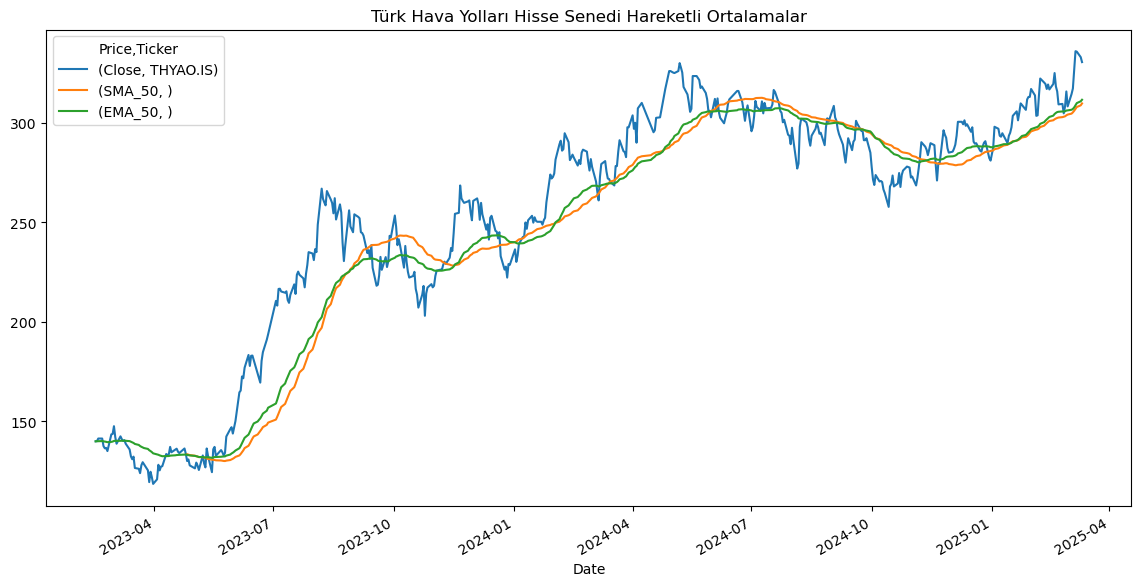

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# Hisse senedi verilerini çekme
data = yf.download('THYAO.IS', start='2023-02-13', end='2025-03-12')

# Hareketli ortalamaları hesapla
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
#Basit Hareketli Ortalama (SMA): Belirli bir dönemdeki fiyatların ortalaması.
#Üssel Hareketli Ortalama (EMA): Daha yeni fiyatlara daha fazla ağırlık veren hareketli ortalama.
# Grafik çizme
data[['Close', 'SMA_50', 'EMA_50']].plot(figsize=(14, 7))
plt.title('Türk Hava Yolları Hisse Senedi Hareketli Ortalamalar')
plt.show()

[*********************100%***********************]  1 of 1 completed


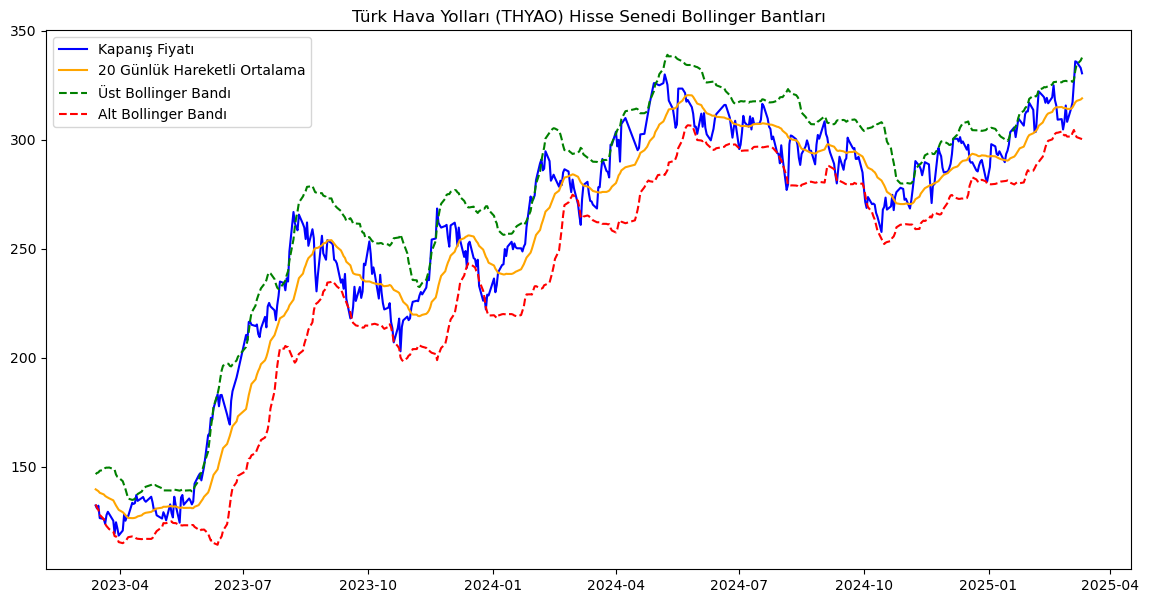

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Hisse senedi verilerini çekme
data = yf.download('THYAO.IS', start='2023-02-13', end='2025-03-12')

# Sütunları düzleştirme
data.columns = ['_'.join(col) for col in data.columns]

# Eksik verileri temizle
data.dropna(subset=['Close_THYAO.IS'], inplace=True)

# Bollinger Bantlarını hesapla
window = 20  # 20 günlük hareketli ortalama ve standart sapma
data['MA20'] = data['Close_THYAO.IS'].rolling(window=window).mean()  # 20 günlük hareketli ortalama
data['Upper Band'] = data['MA20'] + (data['Close_THYAO.IS'].rolling(window=window).std() * 2)  # Üst bant
data['Lower Band'] = data['MA20'] - (data['Close_THYAO.IS'].rolling(window=window).std() * 2)  # Alt bant

# Hesaplanan değerlerdeki eksik verileri temizle
data.dropna(subset=['MA20', 'Upper Band', 'Lower Band'], inplace=True)

# Grafik çizme
plt.figure(figsize=(14, 7))
plt.plot(data['Close_THYAO.IS'], label='Kapanış Fiyatı', color='blue')
plt.plot(data['MA20'], label='20 Günlük Hareketli Ortalama', color='orange')
plt.plot(data['Upper Band'], label='Üst Bollinger Bandı', color='green', linestyle='--')
plt.plot(data['Lower Band'], label='Alt Bollinger Bandı', color='red', linestyle='--')
plt.title('Türk Hava Yolları (THYAO) Hisse Senedi Bollinger Bantları')
plt.legend()
plt.show()

In [17]:
print(data.columns)

MultiIndex([( 'Close', 'THYAO.IS'),
            (  'High', 'THYAO.IS'),
            (   'Low', 'THYAO.IS'),
            (  'Open', 'THYAO.IS'),
            ('Volume', 'THYAO.IS')],
           names=['Price', 'Ticker'])


In [19]:
print(data.head())

Price            Close        High         Low        Open    Volume
Ticker        THYAO.IS    THYAO.IS    THYAO.IS    THYAO.IS  THYAO.IS
Date                                                                
2023-02-15  139.899994  139.899994  135.000000  136.000000  20534049
2023-02-16  140.000000  152.800003  138.800003  151.100006  63980902
2023-02-17  141.300003  143.300003  136.300003  138.300003  31130671
2023-02-20  141.300003  142.399994  139.699997  141.800003  30150790
2023-02-21  137.500000  141.699997  137.500000  140.500000  29105005
